# Features Engineering

## Importation des Bibliotheques

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
import sklearn
import pandas as pd
import pickle
import seaborn as sns
from scipy import stats

# TODO : Importation des librairies
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import load_diabetes

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier, Perceptron, RidgeClassifier, SGDRegressor, PassiveAggressiveRegressor, LinearRegression, Lasso, ElasticNet, Ridge, HuberRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

from sklearn.cluster import KMeans, AgglomerativeClustering, Birch, DBSCAN, MiniBatchKMeans, MeanShift, OPTICS, AffinityPropagation
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
import sklearn
import pandas as pd
import pickle

#metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, precision_recall_curve

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import cross_val_predict
import tensorflow as tf
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline

## Affichage du dataset sauvegardé

In [4]:
df = pd.read_csv('dataset-fraude-detection-fusionner-sans-nan-09-08-2023.csv')
pd.set_option('display.max_columns', None)
df.head(5)

,TransactionID_x,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,TransactionID_y,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,Year,Month,Day
0,2987000,0,68.5,W,13926,321.0,150.0,discover,142.0,credit,315.0,87.0,19.0,7.0,gmail.com,gmail.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,0.0,13.0,0.0,0.0,0.0,0.0,0.791666,0.791666,13.0,13.0,0.0,0.0,0.0,0.0,T,T,T,M2,F,T,F,F,T,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2987004.0,0.0,70787.0,0.0,0.0,0.0,0.0,0.0,-100.0,0.0,0.0,100.0,NotFound,52.0,-480.0,New,NotFound,166.0,15.0,542.0,144.0,252.0,14.0,IP_PROXY:TRANSPARENT,11.0,321.0,161.0,Found,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status

## LabelEncoder des features object categorique

In [5]:
y = 0
for i in range(0, df.shape[1]):
    col_name = df.columns[i]
    if((df[col_name]).dtypes==object):
            print(col_name)
            print(df[col_name].value_counts())
            print('--------------------------------------------')
            y = y+1
print('-----------')
print(y)

ProductCD
W    439670
C     68519
R     37699
H     33024
S     11628
Name: ProductCD, dtype: int64
--------------------------------------------
card4
visa                386344
mastercard          189217
american express      8328
discover              6651
Name: card4, dtype: int64
--------------------------------------------
card6
debit              441509
credit             148986
debit or credit        30
charge card            15
Name: card6, dtype: int64
--------------------------------------------
P_emaildomain
gmail.com           322811
yahoo.com           100934
hotmail.com          45250
anonymous.com        36998
aol.com              28289
comcast.net           7888
icloud.com            6267
outlook.com           5096
msn.com               4092
att.net               4033
live.com              3041
sbcglobal.net         2970
verizon.net           2705
ymail.com             2396
bellsouth.net         1909
yahoo.com.mx          1543
me.com                1522
cox.net         

In [57]:
label_encoder = LabelEncoder()
for col in df.columns:
    if((df[col]).dtypes==object):
        print(col, df[col].dtypes)
        print(df[col])
        print('--------------------------------------------')
        df[col] = df[col].astype(str)
        df[col] = label_encoder.fit_transform(df[col])

ProductCD object
0         W
1         W
2         W
3         W
4         H
         ..
590535    W
590536    W
590537    W
590538    W
590539    W
Name: ProductCD, Length: 590540, dtype: object
--------------------------------------------
card4 object
0           discover
1         mastercard
2               visa
3         mastercard
4         mastercard
             ...    
590535          visa
590536    mastercard
590537    mastercard
590538    mastercard
590539    mastercard
Name: card4, Length: 590540, dtype: object
--------------------------------------------
card6 object
0         credit
1         credit
2          debit
3          debit
4         credit
           ...  
590535     debit
590536     debit
590537     debit
590538     debit
590539    credit
Name: card6, Length: 590540, dtype: object
--------------------------------------------
P_emaildomain object
0           gmail.com
1           gmail.com
2         outlook.com
3           yahoo.com
4           gmail.com
        

## Show p_value &  coefficient of correlation Pearson

In [6]:
for i in range(0, df.shape[1]):
    col_name = df.columns[i]
    if((df[col_name]).dtypes!=object):
        pearson_coef, p_value = stats.pearsonr(df[col_name], df['isFraud'])
        print('Le coefficient de correlation Pearson ', col_name, ' =', pearson_coef, 'avec un P-value de P =' , p_value)


Le coefficient de correlation Pearson  TransactionID_x  = 0.014165772702318266 avec un P-value de P = 1.3377066817525045e-27
Le coefficient de correlation Pearson  isFraud  = 1.0 avec un P-value de P = 0.0
Le coefficient de correlation Pearson  TransactionAmt  = 0.011319825333214972 avec un P-value de P = 3.3434624594158403e-18
Le coefficient de correlation Pearson  card1  = -0.013639969873036398 avec un P-value de P = 1.0415838207195986e-25
Le coefficient de correlation Pearson  card2  = 0.0030816723209934503 avec un P-value de P = 0.017876753475441237
Le coefficient de correlation Pearson  card3  = 0.15402842803992375 avec un P-value de P = 0.0
Le coefficient de correlation Pearson  card5  = -0.032995002201294955 avec un P-value de P = 6.560663866988029e-142
Le coefficient de correlation Pearson  addr1  = 0.008767698006304033 avec un P-value de P = 1.608103458699753e-11
Le coefficient de correlation Pearson  addr2  = -0.020211089166196742 avec un P-value de P = 2.071574916462156e-54


C:\Users\pc\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


## Les features qui sont corrélés avec 'isFraud' (p_value < 0.001) = 343 features

In [59]:
y = 0
for i in range(0, df.shape[1]):
    col_name = df.columns[i]
    if((df[col_name]).dtypes!=object):
        pearson_coef, p_value = stats.pearsonr(df[col_name], df['isFraud'])
        if(p_value<0.001):            
            print('Le coefficient de correlation Pearson ', col_name, ' =', pearson_coef, 'avec un P-value de P =' , p_value)
            y = y+1
print('-----------')
print('Le nombre de features ou (p_value < 0.001) est : ' , y)

Le coefficient de correlation Pearson  TransactionID_x  = 0.014165772702318252 avec un P-value de P = 1.3377066820715447e-27
Le coefficient de correlation Pearson  isFraud  = 0.9999999999999941 avec un P-value de P = 0.0
Le coefficient de correlation Pearson  TransactionAmt  = 0.011319825333215 avec un P-value de P = 3.343462460229985e-18
Le coefficient de correlation Pearson  ProductCD  = -0.15655631946488965 avec un P-value de P = 0.0
Le coefficient de correlation Pearson  card1  = -0.013639969873036424 avec un P-value de P = 1.0415838209250608e-25
Le coefficient de correlation Pearson  card3  = 0.15402842803993055 avec un P-value de P = 0.0
Le coefficient de correlation Pearson  card4  = -0.0044100636386487065 avec un P-value de P = 0.000701497275348992
Le coefficient de correlation Pearson  card5  = -0.032995002201294914 avec un P-value de P = 6.560663868941868e-142
Le coefficient de correlation Pearson  card6  = -0.10046700927775577 avec un P-value de P = 0.0
Le coefficient de cor

## Show the features weakly correlated (where p_value>0.001)  = 93 features

In [60]:
y = 0
for i in range(0, df.shape[1]):
    col_name = df.columns[i]
    if((df[col_name]).dtypes!=object):
        pearson_coef, p_value = stats.pearsonr(df[col_name], df['isFraud'])
        if(p_value>0.001):            
            print('Le coefficient de correlation Pearson ', col_name, ' =', pearson_coef, 'avec un P-value de P =' , p_value)
            y = y+1
print('-----------')
print('Le nombre de features ou (p_value > 0.001) est : ' , y)

Le coefficient de correlation Pearson  card2  = 0.0030816723209935444 avec un P-value de P = 0.017876753480136745
Le coefficient de correlation Pearson  D7  = 0.0028977271717941368 avec un P-value de P = 0.02596032361449552
Le coefficient de correlation Pearson  D8  = -0.00010529308547989444 avec un P-value de P = 0.9355103574976131
Le coefficient de correlation Pearson  D13  = 0.0022790519999841665 avec un P-value de P = 0.07988175790300697
Le coefficient de correlation Pearson  M1  = 0.0012389696289216206 avec un P-value de P = 0.3410440426365423
Le coefficient de correlation Pearson  M2  = 0.00018524353216495512 avec un P-value de P = 0.8868011398386955
Le coefficient de correlation Pearson  V1  = 0.0010216736088587788 avec un P-value de P = 0.43238322678951596
Le coefficient de correlation Pearson  V2  = -0.000540449562279774 avec un P-value de P = 0.6779103944921768
Le coefficient de correlation Pearson  V7  = -0.0016277629562798737 avec un P-value de P = 0.21097874483089266
Le co

## Delete the  93 features

In [64]:
y = 0
for i in range(0, df.shape[1]):
    col_name = df.columns[i]
    if((df[col_name]).dtypes!=object):
        pearson_coef, p_value = stats.pearsonr(df[col_name], df['isFraud'])
        if(p_value>0.001):            
            print('Le coefficient de correlation Pearson ', col_name, ' =', pearson_coef, 'avec un P-value de P =' , p_value)
            df.drop(col_name, axis=1, inplace=True)
            y = y+1
print(y)

0


In [65]:
df.shape

(590540, 344)

## Delete the feature weakly correlated c-a-d (pearson_coef < 0.009 and pearson_coef > 0.001) - 24 au total

In [69]:
y = 0
for i in range(0, df.shape[1]):
    col_name = df.columns[i]
    if((df[col_name]).dtypes!=object):
        pearson_coef, p_value = stats.pearsonr(df[col_name], df['isFraud'])
        if(pearson_coef<0.01 and pearson_coef>0):            
            print('Le coefficient de correlation Pearson ', col_name, ' =', pearson_coef, 'avec un P-value de P =' , p_value)
            df.drop(col_name, axis=1, inplace=True)
            y = y+1
print(y)

0


In [70]:
df.shape

(590540, 320)

# Suppression des colonnes qui contiennent la partie décimale .0

In [71]:
# Liste des colonnes qui contiennent la partie décimale .0
colonnes_decimal_zero = []

# Boucle for pour vérifier chaque colonne
for colonne in df.columns:
    if df[colonne].dtype == float:  # Vérifier si la colonne est de type float
        if df[colonne].apply(lambda x: x.is_integer()).all():  # Vérifier si toutes les valeurs sont des entiers
            colonnes_decimal_zero.append(colonne)

# Afficher les colonnes qui contiennent la partie décimale .0
print(colonnes_decimal_zero)

['card3', 'card5', 'addr2', 'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D10', 'D11', 'D12', 'D14', 'D15', 'V3', 'V4', 'V5', 'V6', 'V10', 'V11', 'V12', 'V13', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V66', 'V67', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V138', 'V139', 'V14

In [72]:
# Boucle for pour modifier les colonnes
for colonne in colonnes_decimal_zero:
    df[colonne] = df[colonne].astype(int)

In [73]:
print("Nombre de colonnes :", len(colonnes_decimal_zero))

Nombre de colonnes : 256


## Afficher le Dataset

In [74]:
# Afficher le Dataset
pd.set_option('display.max_columns', None)
df.head(5)

,TransactionID_x,isFraud,TransactionAmt,ProductCD,card1,card3,card4,card5,card6,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,D1,D2,D3,D4,D5,D6,D9,D10,D11,D12,D14,D15,M4,M6,M7,M8,V3,V4,V5,V6,V10,V11,V12,V13,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V66,V67,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V89,V90,V91,V92,V93,V94,V96,V97,V98,V99,V100,V101,V102,V103,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V129,V131,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V169,V170,V171,V174,V175,V176,V180,V181,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V208,V210,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V235,V236,V237,V238,V239,V242,V243,V244,V245,V246,V247,V248,V249,V250,V252,V253,V254,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V270,V271,V272,V273,V274,V275,V276,V277,V278,V281,V282,V283,V284,V285,V287,V288,V289,V290,V291,V292,V293,V300,V301,V302,V303,V304,V309,V310,V312,V313,V314,V315,V322,V323,V324,V329,V330,V331,V332,V333,V338,TransactionID_y,id_02,id_05,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_31,id_32,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,Year,Month
0,2987000,0,68.5,4,13926,150,1,142,1,87,19,7,16,16,1,1,0,0,0,1,0,0,1,0,2,0,1,14,0,13,0,0,0,0.791666,13,13,0,0,0,2,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,2987004,70787,0,1,1,166,542,144,1,1,123,32,1,0,1,1,1,954,1970,1
1,2987001,0,29.0,4,2755,150,2,102,1,87,0,7,16,16,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0.791666,0,0,0,0,0,0,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,2987008,98945,0,1,1,166,621,500,1,1,98,32,1,0,0,1,1,1727,1970,1
2,2987002,0,59.0,4,4663,150,3,166,2,87,287,7,35,16,1,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0.791666,0,315,0,0,315,0,0,0,0,1,1,1,1,0,0,1,1,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,2987010,191631,0,0,0,121,410,142,0,0,44,24,0,0,1,1,0,1598,1970,1
3,2987003,0,50.0,4,18132,150,2,117,2,87,0,7,53,16,2,5,0,0,0,4,0,0,1,0,1,0,25,112,112,0,94,0,0,0.791666,8

# Correlation entre les features

In [218]:
df.corr().style.background_gradient(cmap='coolwarm')

/usr/local/lib/python3.8/dist-packages/pandas/io/formats/style.py:3618: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.8/dist-packages/pandas/io/formats/style.py:3619: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


## Liste des 20 premiers attributs les plus corrélés avec votre variable cible

In [338]:
#Calculez les corrélations entre toutes les variables du DataFrame et votre variable cible 
correlations = df.corr()['isFraud'].abs()  # Calcule les corrélations et les valeurs absolues

#Triez les corrélations par ordre décroissant 
sorted_correlations = correlations.sort_values(ascending=False)

#Sélectionnez les 20 premières corrélations 
top_20_correlations = sorted_correlations[:10]

#Affichez la liste des attributs les plus corrélés
print(top_20_correlations.index.tolist())

['isFraud', 'V45', 'V86', 'V87', 'V44', 'V52', 'V51', 'V40', 'V79', 'V39']


In [339]:
list_client = ['card1', 'V45', 'V86', 'V87', 'V44', 'V52', 'V51', 'V40', 'V79', 'V39']
df_corr1 = df[list_client]
df_corr1.corr().style.background_gradient(cmap='coolwarm')

,card1,V45,V86,V87,V44,V52,V51,V40,V79,V39
card1,1.000000,-0.011034,-0.005686,-0.006768,-0.008694,0.001434,0.002391,0.003217,0.008735,0.003565
V45,-0.011034,1.000000,0.585396,0.608788,0.905537,0.296102,0.257400,0.271469,0.174002,0.236501
V86,-0.005686,0.585396,1.000000,0.850021,0.604776,0.215183,0.212453,0.217055,0.219672,0.218566
V87,-0.006768,0.608788,0.850021,1.000000,0.515480,0.207535,0.196567,0.213533,0.227383,0.198154
V44,-0.008694,0.905537,0.604776,0.515480,1.000000,0.251881,0.257145,0.225232,0.160821,0.237654
V52,0.001434,0.296102,0.215183,0.207535,0.251881,1.000000,0.954315,0.745758,0.838108,0.740061
V51,0.002391,0.257400,0.212453,0.196567,0.257145,0.954315,1.000000,0.744831,0.876724,0.776707
V40,0.003217,0.271469,0.217055,0.213533,0.225232,0.745758,0.744831,1.000000,0.710335,0.945844
V79,0.008735,0.174002,0.219672,0.227383,0.160821,0.838108,0.876724,0.710335,1.000000,0.739939
V39,0.003565,0.236501,0.218566,0.198154,0.237654,0.740061,0.776707,0.945844,0.739939,1.000000


## Afficher la correlation de ces attributs

In [340]:
correlations = df.corr()['isFraud'].abs()
sorted_correlations = correlations.sort_values(ascending=False)
top_20_attributes = sorted_correlations.index[:10]

df_top_20_correlations = df[top_20_attributes].corr()

pd.set_option('display.max_columns', None)
df_top_20_correlations.head(5)

,isFraud,V45,V86,V87,V44,V52,V51,V40,V79,V39
isFraud,1.000000,0.235436,0.222343,0.221568,0.217870,0.195492,0.182007,0.174672,0.167299,0.166640
V45,0.235436,1.000000,0.585396,0.608788,0.905537,0.296102,0.257400,0.271469,0.174002,0.236501
V86,0.222343,0.585396,1.000000,0.850021,0.604776,0.215183,0.212453,0.217055,0.219672,0.218566
V87,0.221568,0.608788,0.850021,1.000000,0.515480,0.207535,0.196567,0.213533,0.227383,0.198154
V44,0.217870,0.905537,0.604776,0.515480,1.000000,0.251881,0.257145,0.225232,0.160821,0.237654


# Recherche pour identifier le client

In [84]:
#list_client = ['card1', 'V45', 'V86', 'V87', 'V44', 'V52', 'V51', 'V40', 'V79', 'V39','C1','C2','C4','C6','C8','C10','C11','C12','C13','V283']
#list_client = ['card1','C1','C2','C4','C6','C8','C10','C11','C12','C13','V283','V45', 'V86', 'V87', 'V44', 'V52', 'V51', 'V40', 'V79', 'V39']
#list_client = ['card1','C1','C2','C4','C6','C8','C10','C11','C12','C13','V283','V45', 'V86', 'V87', 'V44', 'V52', 'V51', 'V40', 'V79', 'V39', 'V38', 'V43', 'V94', 'V33', 'V17', 'V18', 'V81', 'ProductCD', 'V34', 'V74']

list_client = ['card1','C1','C2','C4','C6','C8','C10','C11','C12','C13','V283','V45', 'V86', 'V87', 'V44', 'V52', 'V51', 'V40', 'V79', 'V39', 'V38', 'V43', 'V94', 'V33', 'V17', 'V18', 'V81', 'ProductCD', 'V34', 'V74', 'V80', 'V93', 'V15', 'V42', 'V92', 'card3', 'V16', 'V37', 'V50']
df_client = df[list_client]
df_client

,card1,C1,C2,C4,C6,C8,C10,C11,C12,C13,V283,V45,V86,V87,V44,V52,V51,V40,V79,V39,V38,V43,V94,V33,V17,V18,V81,ProductCD,V34,V74,V80,V93,V15,V42,V92,card3,V16,V37,V50
0,13926,1,1,0,1,0,0,2,0,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,4,0,0,0,0,0,0,0,150,0,1,0
1,2755,1,1,0,1,0,0,1,0,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,4,0,0,0,0,0,0,0,150,0,1,0
2,4663,1,1,0,1,0,0,1,0,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,4,0,0,0,0,0,0,0,150,0,1,0
3,18132,2,5,0,4,0,0,1,0,25,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,4,0,0,0,0,0,0,0,150,0,1,0
4,4497,1,1,0,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,150,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,6550,2,1,0,0,0,0,1,0,3,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,4,0,0,0,0,0,0,0,150,0,1,0
590536,10444,1,1,0,1,0,0,1,0,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,4,0,0,0,0,0,0,0,150,0,1,0
590537,12037,1,1,0,1,0,0,1,0,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,4,0,0,0,0,0,0,0,150,0,1,0
590538,7826,1,1,0,3,0,0,1,1,5,7,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,4,1,1,0,0,0,0,0,150,0,1,0


## Affiche le nombre de valeur (client) duplique

In [85]:
df_client.duplicated().sum()

237792

## Creer l'ID_client et l'ajouter au dataset

In [86]:
df['ID_client'] = df_client.groupby(list_client).ngroup()

/tmp/ipykernel_37128/495256300.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['ID_client'] = df_client.groupby(list_client).ngroup()


In [87]:
pd.set_option('display.max_columns', None)
df.tail(5)

,TransactionID_x,isFraud,TransactionAmt,ProductCD,card1,card3,card4,card5,card6,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,D1,D2,D3,D4,D5,D6,D9,D10,D11,D12,D14,D15,M4,M6,M7,M8,V3,V4,V5,V6,V10,V11,V12,V13,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V66,V67,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V89,V90,V91,V92,V93,V94,V96,V97,V98,V99,V100,V101,V102,V103,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V129,V131,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V169,V170,V171,V174,V175,V176,V180,V181,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V208,V210,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V235,V236,V237,V238,V239,V242,V243,V244,V245,V246,V247,V248,V249,V250,V252,V253,V254,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V270,V271,V272,V273,V274,V275,V276,V277,V278,V281,V282,V283,V284,V285,V287,V288,V289,V290,V291,V292,V293,V300,V301,V302,V303,V304,V309,V310,V312,V313,V314,V315,V322,V323,V324,V329,V330,V331,V332,V333,V338,TransactionID_y,id_02,id_05,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_31,id_32,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,Year,Month,ID_client
590535,3577535,0,49.00,4,6550,150,3,226,2,87,48,7,16,16,2,1,0,0,1,0,0,0,2,0,1,0,3,29,29,30,0,0,0,0.791666,56,56,0,0,56,0,0,0,0,1,0,0,1,0,0,2,2,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,2,2,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,1,0,1,1,1,1,1,0,0,0,0,0,0,0.0,47.950001,0.0,47.950001,47.950001,47.950001,0,0,0,0,0,0.0,0.0,0.0,0.0,2987004,1102,0,0,0,166,266,507,0,0,47,24,1,0,1,0,0,1598,1970,7,103279
590536,3577536,0,39.50,4,10444,150,2,224,2,87,0,7,16,16,1,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0.791666,0,0,0,0,0,0,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0.0,0.0,0.0,0.0,2987004,1102,0,0,0,166,266,507,0,0,47,24,1,0,1,0,0,1598,1970,7,191326
590537,3577537,0,30.95,4,12037,150,2,224,2,87,0,7,16,16,1,1,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0.791666,0,0,0,0,0,0,1,0,0,1,1,1,1,1,1,1,1,0,0,0,0,1,1,0,0,1,1,1,0,0,1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,1,1,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,1,1,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0.0,0.0,0.0,0.0,2987004,1102,0,0,0,166,266,507,0,0,47,24,1,0,1,0,0,1598,1970,7,221498
590538,3577538,0,117.00,4,78

## Nbre de transaction par client

In [88]:
df["NbTran_by_client"] = df.groupby("ID_client")["TransactionID_x"].transform("count")
df["NbTran_by_client"]

/tmp/ipykernel_37128/1577591100.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["NbTran_by_client"] = df.groupby("ID_client")["TransactionID_x"].transform("count")


0           1
1         131
2         198
3           6
4           3
         ... 
590535      2
590536      3
590537     98
590538      2
590539      5
Name: NbTran_by_client, Length: 590540, dtype: int64

## Somme des transactions par clients

In [89]:
df["SunMontTran_by_client"] = df.groupby("ID_client")["TransactionAmt"].transform("sum")
df["SunMontTran_by_client"]

/tmp/ipykernel_37128/3630176932.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["SunMontTran_by_client"] = df.groupby("ID_client")["TransactionAmt"].transform("sum")


0            68.50
1         56922.92
2         19564.40
3           490.00
4           130.00
            ...   
590535       78.00
590536      654.50
590537    15073.93
590538      234.00
590539      928.40
Name: SunMontTran_by_client, Length: 590540, dtype: float64

## Moyenne des transactions par clients

In [90]:
df["MoyTran_by_client"] = round((df["SunMontTran_by_client"] / df["NbTran_by_client"]), 2)
df["MoyTran_by_client"]


/tmp/ipykernel_37128/1256429695.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["MoyTran_by_client"] = round((df["SunMontTran_by_client"] / df["NbTran_by_client"]), 2)


0          68.50
1         434.53
2          98.81
3          81.67
4          43.33
           ...  
590535     39.00
590536    218.17
590537    153.82
590538    117.00
590539    185.68
Name: MoyTran_by_client, Length: 590540, dtype: float64

## Max et Min Transaction par client

In [91]:
df["MaxMontTran_by_client"] = df.groupby("ID_client")["TransactionAmt"].transform("max")
df["MaxMontTran_by_client"]

/tmp/ipykernel_37128/3122161053.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["MaxMontTran_by_client"] = df.groupby("ID_client")["TransactionAmt"].transform("max")


0           68.50
1         4592.02
2          664.00
3          120.00
4           50.00
           ...   
590535      49.00
590536     335.00
590537    1692.35
590538     117.00
590539     424.95
Name: MaxMontTran_by_client, Length: 590540, dtype: float64

In [92]:
df["MinMontTran_by_client"] = df.groupby("ID_client")["TransactionAmt"].transform("min")
df["MinMontTran_by_client"]

/tmp/ipykernel_37128/4116328102.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["MinMontTran_by_client"] = df.groupby("ID_client")["TransactionAmt"].transform("min")


0          68.50
1          25.95
2          12.50
3          50.00
4          30.00
           ...  
590535     29.00
590536     39.50
590537     21.00
590538    117.00
590539     44.50
Name: MinMontTran_by_client, Length: 590540, dtype: float64

## Difference entre la plus grosse transaction et la plus petite transaction d'un client

In [93]:
df["DiffTran_by_client"] = df["MaxMontTran_by_client"]  - df["MinMontTran_by_client"]

/tmp/ipykernel_37128/2401768043.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["DiffTran_by_client"] = df["MaxMontTran_by_client"]  - df["MinMontTran_by_client"]


## Delete features : 'TransactionID_x','TransactionID_y','ID_client'

In [94]:
df.drop(['TransactionID_x','TransactionID_y','ID_client'], axis=1, inplace=True)

# Sauvegarde dataset

In [95]:
df.to_csv('../Datasets_sauvegardes/dataset-fraude-detection-fusionner-sans-nan-feature-ingeniering-09-08-2023.csv', index=False)

In [8]:
df = pd.read_csv('dataset-fraude-detection-fusionner-sans-nan-feature-ingeniering-09-08-2023.csv')

# Creons une copie du dataset

In [9]:
df_copie = df.copy()

In [10]:
df_copie.shape

(590540, 324)

In [11]:
pd.set_option('display.max_columns', None)
df_copie.head(10)

,isFraud,TransactionAmt,ProductCD,card1,card3,card4,card5,card6,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,D1,D2,D3,D4,D5,D6,D9,D10,D11,D12,D14,D15,M4,M6,M7,M8,V3,V4,V5,V6,V10,V11,V12,V13,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V66,V67,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V89,V90,V91,V92,V93,V94,V96,V97,V98,V99,V100,V101,V102,V103,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V129,V131,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V169,V170,V171,V174,V175,V176,V180,V181,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V208,V210,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V235,V236,V237,V238,V239,V242,V243,V244,V245,V246,V247,V248,V249,V250,V252,V253,V254,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V270,V271,V272,V273,V274,V275,V276,V277,V278,V281,V282,V283,V284,V285,V287,V288,V289,V290,V291,V292,V293,V300,V301,V302,V303,V304,V309,V310,V312,V313,V314,V315,V322,V323,V324,V329,V330,V331,V332,V333,V338,id_02,id_05,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_31,id_32,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,Year,Month,NbTran_by_client,SunMontTran_by_client,MoyTran_by_client,MaxMontTran_by_client,MinMontTran_by_client,DiffTran_by_client
0,0,68.5,4,13926,150,1,142,1,87,19,7,16,16,1,1,0,0,0,1,0,0,1,0,2,0,1,14,0,13,0,0,0,0.791666,13,13,0,0,0,2,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,70787,0,1,1,166,542,144,1,1,123,32,1,0,1,1,1,954,1970,1,1,68.50,68.50,68.50,68.50,0.00
1,0,29.0,4,2755,150,2,102,1,87,0,7,16,16,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0.791666,0,0,0,0,0,0,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,98945,0,1,1,166,621,500,1,1,98,32,1,0,0,1,1,1727,1970,1,131,56922.92,434.53,4592.02,25.95,4566.07
2,0,59.0,4,4663,150,3,166,2,87,287,7,35,16,1,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0.791666,0,315,0,0,315,0,0,0,0,1,1,1,1,0,0,1,1,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,191631,0,0,0,121,410,142,0,0,44,24,0,0,1,1,0,159

## separate X & y

In [12]:
y = df_copie['isFraud']
X = df_copie.drop(['isFraud'], axis=1)

## Split into testing and training data

<b> Stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.</b> 

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.20, stratify = y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((472432, 323), (118108, 323), (472432,), (118108,))

<b>Since there is a categorical imbalance in the target column, this needed to be addressed through the process of SMOTE, or synthetic minority oversampling technique, and is one of the most commonly used oversampling methods to solve the imbalance problem. SMOTE aims to balance class distribution by randomly increasing minority class examples by replicating them</b>

In [15]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [19]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

X_train, y_train = sm.fit_resample(X_train, y_train)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py)

## Créer un modèle Random Forest Classifier 

In [19]:
# Créer un modèle Random Forest Classifier
model_rf_clf_1 = RandomForestClassifier()

# Définir le nombre de folds pour la validation croisée
num_folds = 5

# Définir la métrique de performance à utiliser (par exemple : accuracy,  roc_auc, précision, rappel, etc.)
scoring = 'roc_auc'

# Ajuster le modèle sur les données d'entraînement
model_rf_clf_1.fit(X_train, y_train)

# Effectuer la validation croisée
kfold = KFold(n_splits=num_folds, shuffle=True)
scores = cross_val_score(model_rf_clf_1, X_train, y_train, cv=kfold, scoring=scoring)

# Afficher les scores de chaque fold
print("Scores de validation croisée :")
for i, score in enumerate(scores):
    print(f"Fold {i+1}: {score}")

# Calculer la moyenne et l'écart-type des scores
mean_score = np.mean(scores)
std_score = np.std(scores)
print(f"\nMoyenne des scores : {mean_score}")
print(f"Écart-type des scores : {std_score}")

In [13]:
y_pred_rf_clf = model_rf_clf_1.predict(X_test)
y_pred_rf_clf

array([0, 0, 0, ..., 0, 0, 1])

In [14]:
print('Precision: %.3f' % precision_score(y_test, y_pred_rf_clf))
print('Recall: %.3f' % recall_score(y_test, y_pred_rf_clf))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_rf_clf))
print('F1 Score: %.3f' % f1_score(y_test, y_pred_rf_clf))
print('AUC = %.2f' % roc_auc_score(y_test, y_pred_rf_clf))

Precision: 0.219
Recall: 0.653
Accuracy: 0.906
F1 Score: 0.328
AUC = 0.78


In [ ]:
# Sauvegarder notre model
filename = 'Models_sauvegardes/fraude_detection_model_RF_CLF_10-07-2023.sav'
pickle.dump(model_rf_clf_1, open(filename, 'wb'))

## Creation d'un tableau pour contenier nos prediction de score

In [20]:
#Creation d'un tableau pour contenier nos prediction de score
scores = []

## Entrainnement & Sauvegarder notre model XGB

In [50]:
# XGBoost
xgb = make_pipeline(StandardScaler(), XGBClassifier())

xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

scores.append(['score XGB', xgb.score(X_test, y_test)])
print('score XGB',xgb.score(X_test, y_test))

# Sauvegarder notre model
filename = '../Models_sauvegardes/fraude_detection_model_XGB_09-08-2023.sav'
pickle.dump(xgb, open(filename, 'wb'))

score XGB 0.9661411589392759


## Entrainnement & Sauvegarder notre model catboost

In [306]:
from catboost import CatBoostClassifier

#Cat_Boost = CatBoostClassifier(verbose=0, n_estimators=100)
Cat_Boost = CatBoostClassifier(verbose=0)
Cat_Boost.fit(X_train, y_train)
#scores.append(['score Cat_Boost', Cat_Boost.score(X_test, y_test)])
print('score Cat_Boost',Cat_Boost.score(X_test, y_test))

# Sauvegarder notre model
filename = '../Models_sauvegardes/fraude_detection_model_catboost_17-07-2023.sav'
pickle.dump(Cat_Boost, open(filename, 'wb'))

score Cat_Boost 0.974269312832323


## Entrainnement & Sauvegarder notre model RF_CLF

In [14]:
#rf_clf = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10, min_samples_split=10))
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
scores.append(['Random Forest Classifier', rf_clf.score(X_test, y_test)])
print('score Random Forest Classifier',rf_clf.score(X_test, y_test))

# Sauvegarder notre model
filename = '../Models_sauvegardes/fraude_detection_model_rf_clf_09-08-2023.sav'
pickle.dump(rf_clf, open(filename, 'wb'))

score Random Forest Classifier 0.9796965489213263


In [21]:
# Définir les hyperparamètres à rechercher
param_dist = {
    'n_estimators': np.arange(50, 300, 10),
    'max_depth': [None] + list(np.arange(5, 30, 1)),
    'min_samples_split': np.arange(2, 11, 1),
    'min_samples_leaf': np.arange(1, 11, 1),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [22]:
# Initialiser le modèle RandomForestClassifier
rf = RandomForestClassifier()


In [23]:
# Utiliser la recherche aléatoire pour trouver les meilleurs hyperparamètres
random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=100,
    scoring='roc_auc', n_jobs=-1, cv=5, random_state=42
)

In [ ]:
# Entraîner le modèle avec la recherche aléatoire
random_search.fit(X_train, y_train)

## Entrainnement & Sauvegarder notre model bagging

In [170]:
#  Créez un ensemble de Bagging et obtenez l'accuracy sur le dataset

rfc_bagging_clf = BaggingClassifier(base_estimator=make_pipeline(StandardScaler(), RandomForestClassifier()), random_state=42)
rfc_bagging_clf.fit(X_train, y_train)
#scores.append(['Baggin RandomForestClassifier', rfc_bagging_clf.score(X_test, y_test)])

# Sauvegarder le model
filename = '../Models_sauvegardes/fraude_detection_rfc_bagging_clf_model_09-08-2023.sav'
pickle.dump(rfc_bagging_clf, open(filename, 'wb'))

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


## Entrainnement & Sauvegarder notre model boosting

In [192]:
# Créez un ensemble de Boosting et obtenez l'accuracy sur le dataset

gnc_boosting_clf = make_pipeline(GradientBoostingClassifier(random_state=42))
gnc_boosting_clf.fit(X_train, y_train)
#scores.append(['Boosting Gradient Boosting Classifier', gnc_boosting_clf.score(X_test, y_test)])

# Sauvegarder le model
filename = '../Models_sauvegardes/fraude_detection_gnc_boosting_clf_model_09-08-2023.sav'
pickle.dump(gnc_boosting_clf, open(filename, 'wb'))

## Entrainnement & Sauvegarder notre model VotingClassifier

In [79]:
# VotingClassifier qui comprend un SVC et un decision tree, puis obtenez l'accuracy sur le dataset;

svc_pipe = make_pipeline(StandardScaler(), SVC(random_state=42))
dt_pipe = make_pipeline(DecisionTreeClassifier(random_state=42))

estimators = [('svc',svc_pipe), ('dt', dt_pipe)]

In [80]:
voting_clf = VotingClassifier(estimators=estimators)
voting_clf.fit(X_train, y_train)

#scores.append(['VotingClassifier', voting_clf.score(X_test, y_test)])

# Sauvegarder le model
filename = '../Models_sauvegardes/fraude_detection_voting_clf_model_16-07-2023.sav'
pickle.dump(voting_clf, open(filename, 'wb'))

# Imprimez tous les scores obtenus dans un tableau

In [ ]:
# Imprimez tous les scores obtenus dans un tableau
print(tabulate(scores, headers=['Classifier', 'Accuracy']))

## Les predictions

# xgb

In [96]:
y_pred = xgb.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [97]:
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))


Precision: 0.515
Recall: 0.569
Accuracy: 0.966
F1 Score: 0.541


In [98]:
from sklearn import metrics
print('AUC = %.2f' % roc_auc_score(y_test, y_pred))  #1

#metrics.plot_roc_curve(xgb, X_test, y_test, ax=plt.gca())  #2
#plt.show()

AUC = 0.77


In [376]:
# Définition d'un seuil de classification (par exemple 60%)
threshold = 0.6

# Labels prédits pour un seuil donné
label_pred_threshold = (y_pred > threshold).astype(int)
# Calcul de la matrice de confusion pour un seuil donné
matrix_threshold = confusion_matrix(
    y_true=y_test, y_pred=label_pred_threshold
)

print(matrix_threshold)

[[110761   3214]
 [  1470   2663]]


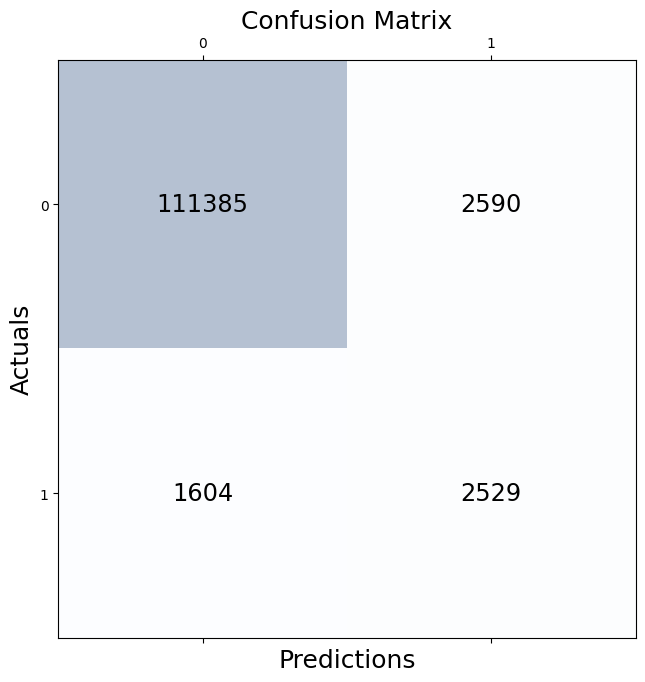

In [83]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
# Extract the true positive, true negative, false positive, and false negative values from the confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()
 
# Print the true positive, true negative, false positive, and false negative values
print("True Positive (TP): ", tp)
print("True Negative (TN): ", tn)
print("False Positive (FP): ", fp)
print("False Negative (FN): ", fn)

True Positive (TP):  2426
True Negative (TN):  111404
False Positive (FP):  2571
False Negative (FN):  1707


In [ ]:
df_prediction = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df_prediction

,Actual,Predicted
203495,0,0
227933,0,0
262769,0,0
388075,0,0
46351,0,0
...,...,...
124716,0,0
338566,0,1
390049,0,0
380116,0,0


In [ ]:
#Create classification report
from sklearn.metrics import classification_report

class_report=classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98    113975
           1       0.49      0.59      0.53      4133

    accuracy                           0.96    118108
   macro avg       0.74      0.78      0.76    118108
weighted avg       0.97      0.96      0.97    118108



In [ ]:
importance = xgb.named_steps['XGBClassifier'].feature_importances_
print(importance)

KeyError: 'XGBClassifier'

# RF_CLF

In [15]:
y_pred_rf_clf = rf_clf.predict(X_test)
y_pred_rf_clf

array([0, 0, 0, ..., 0, 0, 1])

In [16]:
print('Precision: %.3f' % precision_score(y_test, y_pred_rf_clf))
print('Recall: %.3f' % recall_score(y_test, y_pred_rf_clf))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_rf_clf))
print('F1 Score: %.3f' % f1_score(y_test, y_pred_rf_clf))


Precision: 0.793
Recall: 0.568
Accuracy: 0.980
F1 Score: 0.662


In [18]:
from sklearn import metrics
print('AUC = %.2f' % roc_auc_score(y_test, y_pred_rf_clf))  #1

#metrics.plot_roc_curve(rf_clf, X_test, y_test, ax=plt.gca())  #2
#plt.show()

AUC = 0.78


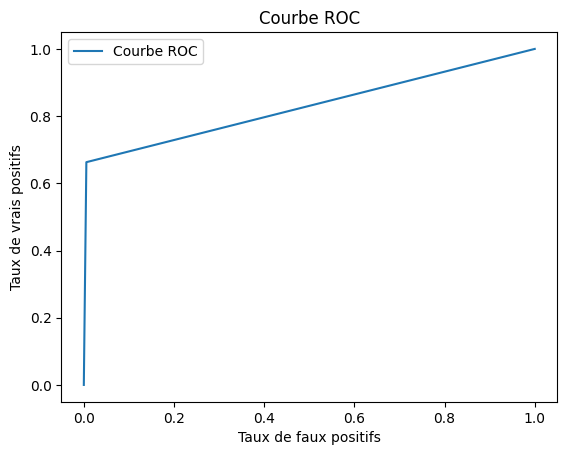

In [112]:
# Calculer les valeurs de ROC
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_rf_clf)
# Tracer la courbe ROC
plt.plot(fpr, tpr, label='Courbe ROC')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend()
plt.show()

In [165]:
# Définition d'un seuil de classification (par exemple 60%)
threshold = 0.6

# Labels prédits pour un seuil donné
label_pred_threshold = (y_pred_rf_clf > threshold).astype(int)
# Calcul de la matrice de confusion pour un seuil donné
matrix_threshold = confusion_matrix(
    y_true=y_test, y_pred=label_pred_threshold
)

print(matrix_threshold)

[[113099    876]
 [  1535   2598]]


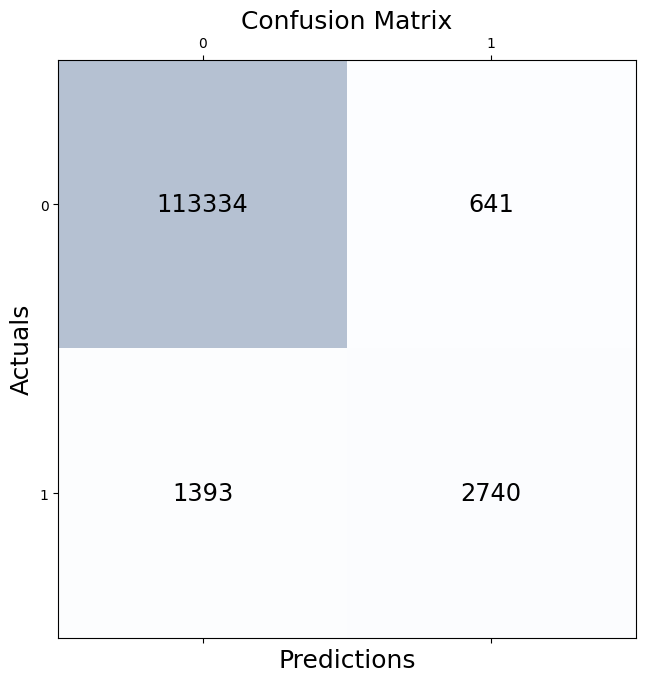

In [114]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_rf_clf)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [115]:
# Extract the true positive, true negative, false positive, and false negative values from the confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()
 
# Print the true positive, true negative, false positive, and false negative values
print("True Positive (TP): ", tp)
print("True Negative (TN): ", tn)
print("False Positive (FP): ", fp)
print("False Negative (FN): ", fn)

True Positive (TP):  2740
True Negative (TN):  113334
False Positive (FP):  641
False Negative (FN):  1393


In [116]:
df_prediction_rfc = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred_rf_clf})
df_prediction_rfc

,Actual,Predicted
203495,0,0
227933,0,0
262769,0,0
388075,0,0
46351,0,0
...,...,...
124716,0,0
338566,0,0
390049,0,0
380116,0,0


# Cat Boost

In [307]:
y_pred_catBoost = Cat_Boost.predict(X_test)
y_pred_catBoost

array([0, 0, 0, ..., 0, 0, 1])

In [308]:
print('Precision: %.3f' % precision_score(y_test, y_pred_catBoost))
print('Recall: %.3f' % recall_score(y_test, y_pred_catBoost))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_catBoost))
print('F1 Score: %.3f' % f1_score(y_test, y_pred_catBoost))


Precision: 0.635
Recall: 0.623
Accuracy: 0.974
F1 Score: 0.629


In [309]:
from sklearn import metrics
print('AUC = %.2f' % roc_auc_score(y_test, y_pred_catBoost))  #1

#metrics.plot_roc_curve(Cat_Boost, X_test, y_test, ax=plt.gca())  #2
#plt.show()

AUC = 0.81


In [92]:
# Définition d'un seuil de classification (par exemple 60%)
threshold = 0.6

# Labels prédits pour un seuil donné
label_pred_threshold = (y_pred_catBoost > threshold).astype(int)
# Calcul de la matrice de confusion pour un seuil donné
matrix_threshold = confusion_matrix(
    y_true=y_test, y_pred=label_pred_threshold
)

print(matrix_threshold)

[[109820   4155]
 [  1376   2757]]


In [77]:
# Extract the true positive, true negative, false positive, and false negative values from the confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()
 
# Print the true positive, true negative, false positive, and false negative values
print("True Positive (TP): ", tp)
print("True Negative (TN): ", tn)
print("False Positive (FP): ", fp)
print("False Negative (FN): ", fn)

True Positive (TP):  2950
True Negative (TN):  103858
False Positive (FP):  10117
False Negative (FN):  1183


In [ ]:
df_prediction_catBoost = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred_catBoost})
df_prediction_catBoost

,Actual,Predicted
203495,0,0
227933,0,0
262769,0,0
388075,0,0
46351,0,0
...,...,...
124716,0,0
338566,0,1
390049,0,0
380116,0,0


# Bagging

In [171]:
y_pred_bagging_clf = rfc_bagging_clf.predict(X_test)
y_pred_bagging_clf

array([0, 0, 0, ..., 0, 0, 1])

In [172]:
print('Precision: %.3f' % precision_score(y_test, y_pred_bagging_clf))
print('Recall: %.3f' % recall_score(y_test, y_pred_bagging_clf))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_bagging_clf))
print('F1 Score: %.3f' % f1_score(y_test, y_pred_bagging_clf))


Precision: 0.727
Recall: 0.638
Accuracy: 0.979
F1 Score: 0.679


In [173]:
from sklearn import metrics
print('AUC = %.2f' % roc_auc_score(y_test, y_pred_bagging_clf))  #1


AUC = 0.81


In [174]:
# Définition d'un seuil de classification (par exemple 60%)
threshold = 0.6

# Labels prédits pour un seuil donné
label_pred_threshold = (y_pred_bagging_clf > threshold).astype(int)
# Calcul de la matrice de confusion pour un seuil donné
matrix_threshold = confusion_matrix(
    y_true=y_test, y_pred=label_pred_threshold
)

print(matrix_threshold)

[[112983    992]
 [  1497   2636]]


# Boosting_clf

# Manipulation des donnees de Test (test_identity et test_transaction)

In [3]:
df_test_identity = pd.read_csv('../Dataset-iee/test_identity.csv')
df_test_transaction = pd.read_csv('../Dataset-iee/test_transaction.csv')

df_test = df_test_transaction.merge(df_test_identity,how ='left',left_index=True,right_index=True)


In [18]:
# Afficher le DataFrame avec la colonne "TransactionDT" convertie
pd.set_option('display.max_columns', None)
df_test.head(5)

,TransactionID_x,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,TransactionID_y,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,id-10,id-11,id-12,id-13,id-14,id-15,id-16,id-17,id-18,id-19,id-20,id-21,id-22,id-23,id-24,id-25,id-26,id-27,id-28,id-29,id-30,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,NaN,418.0,203.0,NaN,NaN,NaN,409.0,T,T,F,NaN,NaN,F,T,T,T,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3663586.0,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,427.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN

In [5]:
df_test.shape

(506691, 434)

In [4]:
df_test.isnull().sum()

TransactionID_x         0
TransactionDT           0
TransactionAmt          0
ProductCD               0
card1                   0
                    ...  
id-36              369714
id-37              369714
id-38              369714
DeviceType         369760
DeviceInfo         391634
Length: 434, dtype: int64

## Afficher la ligne du dataset qui a le plus de NaN

In [7]:
# Trouver la ligne avec le plus de NaN
row_with_most_nan = df_test.iloc[df_test.isnull().sum(axis=1).idxmax()]

# Afficher la ligne avec le plus de NaN
print(row_with_most_nan)

TransactionID_x     3877077
TransactionDT      25899714
TransactionAmt         25.0
ProductCD                 S
card1                 10052
                     ...   
id-36                   NaN
id-37                   NaN
id-38                   NaN
DeviceType              NaN
DeviceInfo              NaN
Name: 213528, Length: 434, dtype: object